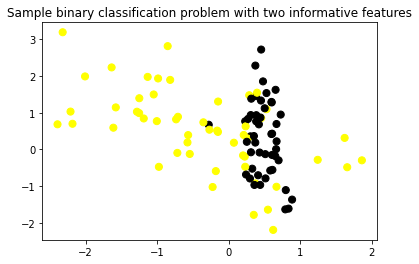

In [8]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot


cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()


#### Linear Support Vector Machine
Maximize the margin

0.8
0.76


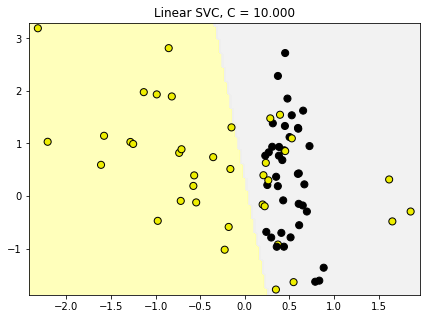

In [17]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

this_C=10
clf=SVC(kernel='linear',C=this_C).fit(X_train,y_train) ###

print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

fig, subaxes = plt.subplots(1, 1, figsize=(7, 5))
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

#### Kenelized Support Vector Machine

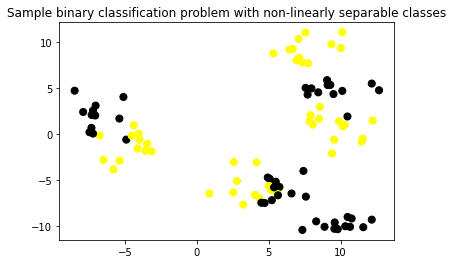

-5.362751882255163


In [52]:
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()
print(X_D2[1][1])

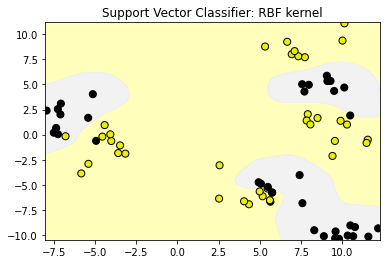

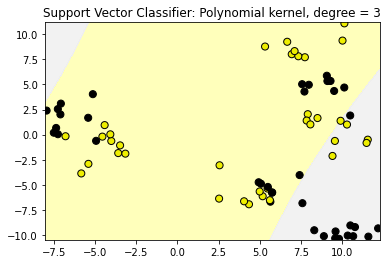

In [56]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

SVC_model=SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
# The default SVC kernel is radial basis function (RBF)
this_gamma=0.5 ###gamma need to be adjusted
plot_class_regions_for_classifier(SVC_model,
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

#print(SVC_model.predict([[1, 2]])
# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 2)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')